In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dino.environments.playground import PlaygroundEnvironment
from exlab.interface.graph import display
from dino.utils.move import MoveConfig
env = PlaygroundEnvironment()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
2020-09-24 16:28:07 BlackSky exlogger:c[18628] INFO [modular] Module 'PlaygroundEnvironment' has been started


In [3]:
env.displayGui(True)

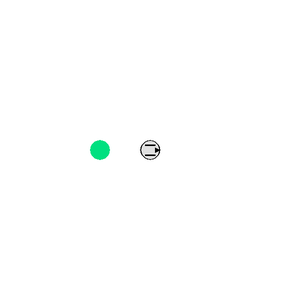

In [4]:
# env.displayGui(True)
env.image()

In [6]:
from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())

2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'ModelDataset' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'ModelDataset' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'Agent' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'Performer' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'planner' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'InterestModelManager' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2020-09-24 16:28:17 BlackSky exlogger:c[18628] INFO [modular] Module 'Strategy autonomousStrategy' has been started


In [7]:
from cdl.agents.tools.models.interest_model import InterestModel
mnc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), register=False)
mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))
mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))

2020-09-24 16:28:19 BlackSky exlogger:c[18628] INFO [model] New model added: Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#10↝👁'#Cylinder1.position'↕2)
2020-09-24 16:28:19 BlackSky exlogger:c[18628] INFO [model] New model added: Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#16↝👁'#Agent.lidar':PRE↕8 => @☰#7↝👁'#Agent.position'↕2)
2020-09-24 16:28:19 BlackSky exlogger:c[18628] INFO [model] New model added: Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#11↝👁'#Cylinder1.positionToAgent'↕2)


In [22]:
learner.train(200)
env.run()

2020-09-24 16:31:51 BlackSky exlogger:c[18628] INFO [interest] Splitting along dim 1: -21.2779 for Region @☰∥#18⇉👁[↝👁'#Agent.position' ↝👁'#Agent.lidar']↕10
    Left: None
    <Cut 1d -21.2779 #10>
    Right: None
Should del context column 0 (+-0.00017168110812160187) around Observation[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰± 14.003,  39.570]
Conflict trying to update current area, creating a new one
Should del context column 1 (+0.011513241843459032) around Observation[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰± 16.373, -18.052]
Conflict trying to update current area, creating a new one
Should del context column 1 (+0.00159700963601761) around Observation[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-21.317,  14.373]
Conflict trying to update current area, creating a new one
Should del context column 1 (+-0.00040235419142964357) around Observation[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰± 36.115, -47.349]
Conflict trying to update current area, creating a new one
Should del context column 1 (+0.00

In [11]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
logger().setRecordLevel(Logger.DEBUG2, 'plan')
logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [72]:
learner.dataset.competences()

{Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#10↝👁'#Cylinder1.position'↕2): 0.972433278386756,
 Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#16↝👁'#Agent.lidar':PRE↕8 => @☰#7↝👁'#Agent.position'↕2): 0.9938670606581427,
 Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#11↝👁'#Cylinder1.positionToAgent'↕2): 0.9568404983887524}

In [40]:
mo.competence()

0.7923626552921336

In [41]:
[area.columns for area in mrp.contextSpacialization.areas]

[array([ True,  True]),
 array([False, False]),
 array([ True,  True]),
 array([ True,  True]),
 array([ True,  True]),
 array([ True,  True]),
 array([ True,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False, False]),
 array([ True,  True]),
 array([False,  True]),
 array([False, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True,  True]),
 array([ True,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True,  True]),
 array([False, False]),
 array([False, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True,  True]),
 array([False, False]),
 array([False,  True]),
 array([False,  True]),
 array([False, False]),
 array([ True,  True]),
 array([ True,  True]),
 array([False, False]),
 array([ True,  

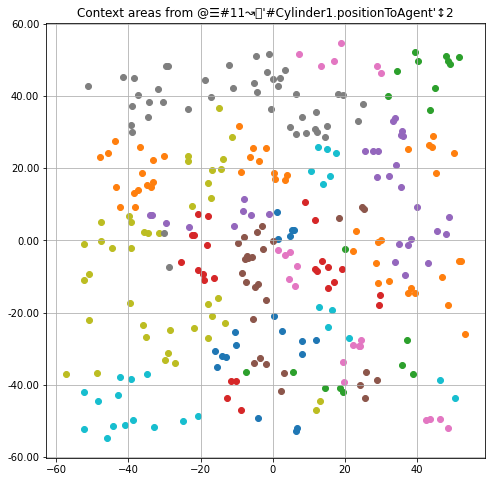

In [42]:
display(mrp.contextSpacialization.visualizeAreas())

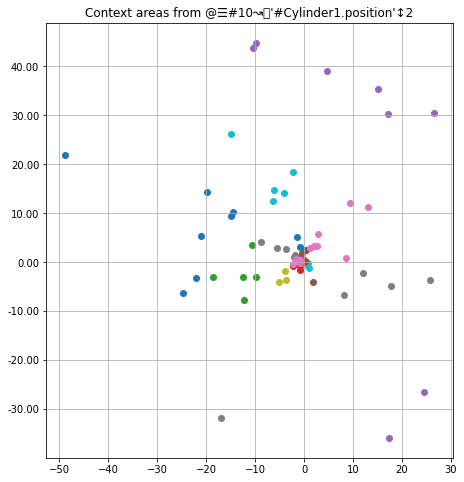

In [43]:
display(mo.contextSpacialization.visualizeAreas())

2020-09-24 16:33:22 BlackSky exlogger:c[18628] DEBUG [plan] Parting space to find models reaching @☰#7↝👁'#Agent.position'↕2
2020-09-24 16:33:22 BlackSky exlogger:c[18628] DEBUG [plan] === New planning (d0) === -> Goal[#7↝👁'#Agent.position'↕2 @☰± 100.000,  0.000] using Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#16↝👁'#Agent.lidar':PRE↕8 => @☰#7↝👁'#Agent.position'↕2) with context None
2020-09-24 16:33:22 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Iter 0: chosen subgoal is Data[#7↝👁'#Agent.position'↕2 @☰± 100.000,  0.000](->Data[#7↝👁'#Agent.position'↕2 @☰± 100.000,  0.000]) (direct=True) (final goal Data[#7↝👁'#Agent.position'↕2 @☰± 100.000,  0.000]) with context State ([SingleData(#7↝👁'#Agent.position'↕2 @☰[' 322.144', ' 270.878']), SingleData(#21↝👁'#Agent.positionToAgent'↕2 @☰[' 0.000', ' 0.000']), SingleData(#15↝👁'#Agent.lidar'↕8 @☰[' 100.000', ' 100.000', ' 100.000', ' 47.337', ' 100.000', ' 100.000', ' 100.000', ' 100.000']), SingleData(#10↝👁'#Cylinder1.position'↕2 @☰[' 273.968', ' 330.500']

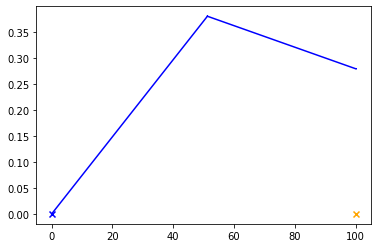

2020-09-24 16:33:22 BlackSky exlogger:c[18628] DEBUG [plan] (d0) Planning generated for goal Data[#7↝👁'#Agent.position'↕2 @☰± 100.000,  0.000] in 2 step(s)
2020-09-24 16:33:22 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Planning sub level actions...
2020-09-24 16:33:22 BlackSky exlogger:c[18628] Level 5 [plan] (d0) ...not needed, all actions are primitives
2020-09-24 16:33:22 BlackSky exlogger:c[18628] DEBUG [plan] Parting space to find models reaching @☰#7↝👁'#Agent.position'↕2
2020-09-24 16:33:22 BlackSky exlogger:c[18628] DEBUG [plan] === New planning (d0) === -> Goal[#7↝👁'#Agent.position'↕2 @☰ 422.144,  270.878] using Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#16↝👁'#Agent.lidar':PRE↕8 => @☰#7↝👁'#Agent.position'↕2) with context None
2020-09-24 16:33:22 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Iter 0: chosen subgoal is Data[#7↝👁'#Agent.position'↕2 @☰±-3.809,  1.421](->Data[#7↝👁'#Agent.position'↕2 @☰±-3.809,  1.421]) (direct=True) (final goal Data[#7↝👁'#Agent.position'↕2 @☰±-3.809,  1.4

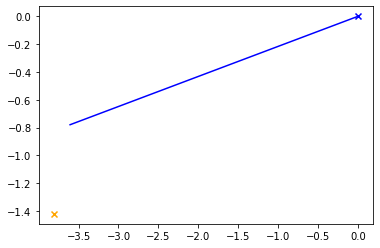

2020-09-24 16:33:23 BlackSky exlogger:c[18628] DEBUG [plan] (d0) Planning generated for goal Data[#7↝👁'#Agent.position'↕2 @☰±-3.809,  1.421] in 1 step(s)
2020-09-24 16:33:23 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Planning sub level actions...
2020-09-24 16:33:23 BlackSky exlogger:c[18628] Level 5 [plan] (d0) ...not needed, all actions are primitives
<<
    <class 'dino.data.data.Data'>(#6↝🕹'#Agent.move'↕2 @☰±-0.068,  0.026 - to reach→ #7↝👁'#Agent.position'↕2 @☰±-3.606,  0.780)
>>


In [27]:
learner.reach(learner.propertySpace('Agent.position').point([100, 0]).setRelative(True))
env.run()

2020-09-24 16:52:35 BlackSky exlogger:c[18628] DEBUG [plan] Parting space to find models reaching @☰#11↝👁'#Cylinder1.positionToAgent'↕2
2020-09-24 16:52:35 BlackSky exlogger:c[18628] DEBUG [plan] === New planning (d0) === -> Goal[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰ 0.000, -70.000] using Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#11↝👁'#Cylinder1.positionToAgent'↕2) with context None
2020-09-24 16:52:35 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Iter 0: chosen subgoal is Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-1.136, -143.133](->Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-1.136, -143.133]) (direct=True) (final goal Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-1.136, -143.133]) with context State ([SingleData(#7↝👁'#Agent.position'↕2 @☰[' 287.180', ' 296.730']), SingleData(#21↝👁'#Agent.positionToAgent'↕2 @☰[' 0.000', ' 0.000']), SingleData(#15↝👁'#Agent.lidar'↕8 @☰[' 100.000', ' 100.000', ' 43.155', ' 100.000', ' 100.000', ' 100.000', ' 100.00

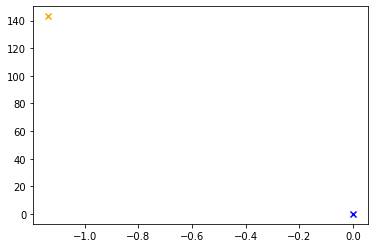

2020-09-24 16:52:36 BlackSky exlogger:c[18628] DEBUG [plan] (d0) Planning failed for goal Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-1.136, -143.133] in 30 step(s)
2020-09-24 16:52:36 BlackSky exlogger:c[18628] Level 5 [plan] (d0) Planning sub level actions...
2020-09-24 16:52:36 BlackSky exlogger:c[18628] Level 5 [plan] (d0) ...not needed, all actions are primitives
2020-09-24 16:52:36 BlackSky exlogger:c[18628] WARNING [strategy] Planning failed for goal Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰ 0.000, -70.000], switching to random
<<
   
>>


In [74]:
config = MoveConfig(goal=learner.propertySpace('#Cylinder1.positionToAgent').point([0, -70]).setRelative(False))
config.plannerSettings.dontMoveSpaces.append(learner.propertySpace('#Cylinder1.position'))
learner.reach(config)
env.run()

In [69]:
mo.forward(learner.propertySpace('Agent.move').action([-0.48, 0.571]), context=env.state().context())

(Data[#10↝👁'#Cylinder1.position'↕2 @☰± 0.000,  0.000], 0.0)

In [68]:
learner.propertySpace('Agent.move').convertTo(spaceManager=learner.dataset)

@☰#6↝🕹'#Agent.move'↕2

In [70]:
env.spaces

[@#0→👁'#Agent.position'↕2,
 @#1→👁'#Agent.positionToAgent'↕2,
 @#2→👁'#Agent.lidar'↕8,
 @#3→🕹'#Agent.move'↕2,
 @#4→👁'#Cylinder1.position'↕2,
 @#5→👁'#Cylinder1.positionToAgent'↕2,
 @∥#20⇉👁[→👁'#Cylinder1.position' →👁'#Cylinder1.positionToAgent' →👁'#Agent.positionToAgent' →👁'#Agent.position' →👁'#Agent.lidar']↕16,
 @#23↝👁'#Agent.position':PRE↕2,
 @#24↝👁'#Agent.positionToAgent':PRE↕2,
 @#25↝👁'#Agent.lidar':PRE↕8,
 @#26↝👁'#Cylinder1.position':PRE↕2,
 @#27↝👁'#Cylinder1.positionToAgent':PRE↕2,
 @∥#28⇉👁[↝👁'#Agent.position' ↝👁'#Cylinder1.position' ↝👁'#Cylinder1.positionToAgent' ↝👁'#Agent.positionToAgent' ↝👁'#Agent.lidar']↕16,
 @∥#34⇉👁[→👁'#Cylinder1.position' →👁'#Agent.lidar' →👁'#Agent.position' →👁'#Agent.positionToAgent']↕14,
 @∥#36⇉👁[→👁'#Cylinder1.position' →👁'#Agent.lidar' →👁'#Cylinder1.positionToAgent' →👁'#Agent.positionToAgent']↕14]

2020-09-24 14:49:55 BlackSky exlogger:c[11000] Level 5 [plan] (d1) Iter 8: move still not reachable, trying to reach a different context Data[#12↝👁'#Cylinder1.positionToAgent':PRE↕2 @☰± 30.632, -27.193]
2020-09-24 14:49:55 BlackSky exlogger:c[11000] Level 5 [plan] (d1) Iter 8: move reachable with new context, is the context reachable?
2020-09-24 14:49:55 BlackSky exlogger:c[11000] DEBUG [plan] Parting space to find models reaching @☰#11↝👁'#Cylinder1.positionToAgent'↕2
2020-09-24 14:49:55 BlackSky exlogger:c[11000] DEBUG [plan] === New planning (d2) === -> Goal[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰± 30.632, -27.193] using Model(@☰#6↝🕹'#Agent.move'↕2 | @☰#12↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#11↝👁'#Cylinder1.positionToAgent'↕2) with context State ([SingleData(#7↝👁'#Agent.position'↕2 @☰[' 536.934', ' 214.241']), SingleData(#21↝👁'#Agent.positionToAgent'↕2 @☰[' 0.000', ' 0.000']), SingleData(#15↝👁'#Agent.lidar'↕8 @☰[' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.0

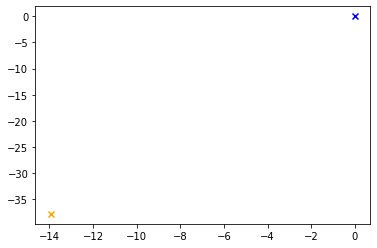

2020-09-24 14:49:56 BlackSky exlogger:c[11000] DEBUG [plan] (d1) Planning failed for goal Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-13.952,  37.761] in 10 step(s)
2020-09-24 14:49:56 BlackSky exlogger:c[11000] Level 5 [plan] (d1) Planning sub level actions...
2020-09-24 14:49:56 BlackSky exlogger:c[11000] Level 5 [plan] (d1) ...not needed, all actions are primitives
2020-09-24 14:49:56 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 4: move Goal[#10↝👁'#Cylinder1.position'↕2 @☰±-5.750,  32.608] is reachable
2020-09-24 14:49:56 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 4: node Node <class 'dino.data.data.Data'>(#6↝🕹'#Agent.move'↕2 @☰±-0.140,  0.312 - to reach→ #10↝👁'#Cylinder1.position'↕2 @☰±-2.577,  12.472) attached to Node <class 'dino.data.data.Data'>(#6↝🕹'#Agent.move'↕2 @☰± 3.503, -2.340 - to reach→ #10↝👁'#Cylinder1.position'↕2 @☰± 13.431,  25.187)
2020-09-24 14:49:56 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 4: distance from goal 176.744 (max 4.828)
2020-0

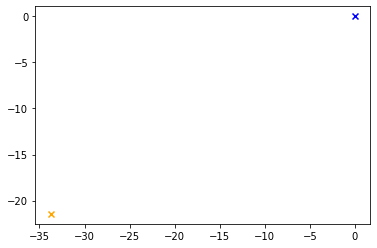

2020-09-24 14:50:00 BlackSky exlogger:c[11000] DEBUG [plan] (d1) Planning failed for goal Data[#11↝👁'#Cylinder1.positionToAgent'↕2 @☰±-33.773,  21.442] in 10 step(s)
2020-09-24 14:50:00 BlackSky exlogger:c[11000] Level 5 [plan] (d1) Planning sub level actions...
2020-09-24 14:50:00 BlackSky exlogger:c[11000] Level 5 [plan] (d1) ...not needed, all actions are primitives
2020-09-24 14:50:00 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 8: move Goal[#10↝👁'#Cylinder1.position'↕2 @☰±-31.130,  13.023] is reachable
2020-09-24 14:50:00 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 8: node Node <class 'dino.data.data.Data'>(#6↝🕹'#Agent.move'↕2 @☰±-0.191,  0.240 - to reach→ #10↝👁'#Cylinder1.position'↕2 @☰±-15.305,  7.038) attached to Node <class 'dino.data.data.Data'>(#6↝🕹'#Agent.move'↕2 @☰± 0.425, -2.357 - to reach→ #10↝👁'#Cylinder1.position'↕2 @☰±-31.061, -14.952)
2020-09-24 14:50:00 BlackSky exlogger:c[11000] Level 5 [plan] (d0) Iter 8: distance from goal 106.566 (max 4.828)
2020-

KeyboardInterrupt: 

In [23]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([0, -10]).setRelative(True))
env.run()

In [16]:
learner.propertySpace('Agent.position').point([0, 0])

Data[#6↝👁'#Agent.position'↕2 @☰± 0.000,  0.000]

In [34]:
env.world.observe()

Observation[Observation[#0→👁'#Agent.position'↕2 @± 347.859,  362.412]
    Observation[#1→👁'#Agent.positionToAgent'↕2 @± 0.000,  0.000]
    Observation[#2→👁'#Agent.lidar'↕8 @± 100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  100.000]
    Observation[#4→👁'#Cylinder1.position'↕2 @± 292.165,  511.024]
    Observation[#5→👁'#Cylinder1.positionToAgent'↕2 @±-55.693,  148.612]]

In [11]:
env.iteration

200

In [18]:
learner.iteration

3

In [69]:
learner.dataset.spaces[0].number

512

In [70]:
learner.dataset.spaces[0].data

array([[ 0.32286985, -0.19646247],
       [ 0.37222594,  0.07765963],
       [ 0.2425151 , -0.68859405],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [20]:
env.iteration

11

In [29]:
print(mc)
print(mnc)

Model(@☰#4↝🕹'#Agent.move'↕2 | @☰#9↝👁'#Agent.lidar':PRE↕8 => @☰#5↝👁'#Agent.position'↕2)
Model(@☰#4↝🕹'#Agent.move'↕2 | @NullSpace => @☰#5↝👁'#Agent.position'↕2)


In [27]:
print(mnc.competence(precise=True))
print(mc.competence(precise=True))
print(mo.competence(precise=True))

0.9931080749814198

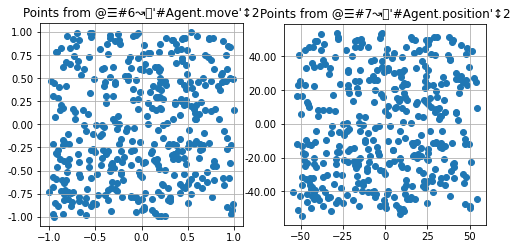

In [23]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

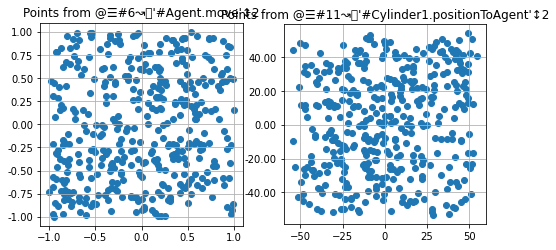

In [24]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.positionToAgent').visualizeData())

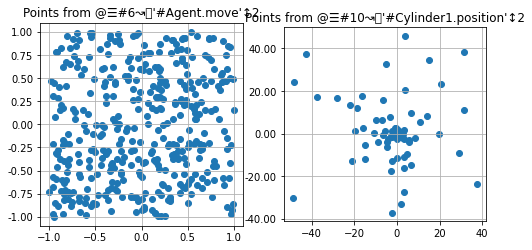

In [25]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [26]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
im

Region @☰#6↝👁'#Agent.position'↕2
    Left: Region @☰#6↝👁'#Agent.position'↕2
        Left: None
        <Cut Noned 0.0000 #2>
        Right: None
    <Cut 0d -12.0612 #2>
    Right: Region @☰#6↝👁'#Agent.position'↕2
        Left: Region @☰#6↝👁'#Agent.position'↕2
            Left: None
            <Cut Noned 0.0000 #2>
            Right: None
        <Cut 0d -9.9797 #2>
        Right: Region @☰#6↝👁'#Agent.position'↕2
            Left: Region @☰#6↝👁'#Agent.position'↕2
                Left: Region @☰#6↝👁'#Agent.position'↕2
                    Left: None
                    <Cut Noned 0.0000 #2>
                    Right: None
                <Cut 1d -19.2330 #2>
                Right: Region @☰#6↝👁'#Agent.position'↕2
                    Left: None
                    <Cut Noned 0.0000 #2>
                    Right: None
            <Cut 0d 13.9845 #2>
            Right: Region @☰#6↝👁'#Agent.position'↕2
                Left: None
                <Cut Noned 0.0000 #2>
                Right: N